In [2]:
# Import necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
# Check the shape of the training and testing sets
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (25000,)
Testing data shape: (25000,)


In [5]:
# Explore a sample review and its corresponding sentiment label
print("Sample Review:")
print(x_train[0])
print("Sentiment Label:")
print(y_train[0])

Sample Review:
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Sentiment Label:
1


In [6]:
# Decode the sample review back to words
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[0]])

print("Decoded Review:")
print(decoded_review)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 2s 1us/step
Decoded Review:
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are am

In [7]:
# Perform data preprocessing
max_length = 100
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)

In [8]:
# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=8, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

C:\Users\CCC\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [9]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6022 - loss: 0.6723 - val_accuracy: 0.8042 - val_loss: 0.4746
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.8458 - loss: 0.4055 - val_accuracy: 0.8464 - val_loss: 0.3546
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.8951 - loss: 0.2759 - val_accuracy: 0.8534 - val_loss: 0.3316
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.9225 - loss: 0.2210 - val_accuracy: 0.8502 - val_loss: 0.3304
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.9445 - loss: 0.1718 - val_accuracy: 0.8500 - val_loss: 0.3353


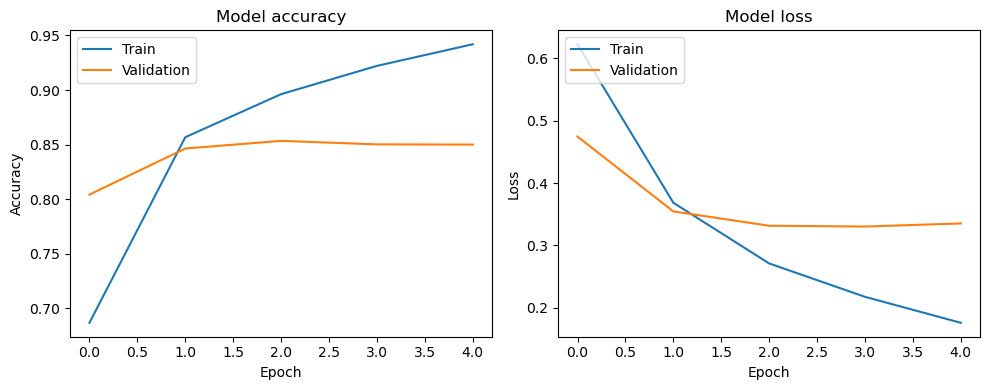

In [12]:
# Visualize training history
def plot_history(history):
    plt.figure(figsize=(10, 4))
    
    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Visualize training history
plot_history(history)

In [13]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("\nTest Accuracy:", test_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.8503 - loss: 0.3400

Test Accuracy: 0.8500400185585022


782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step


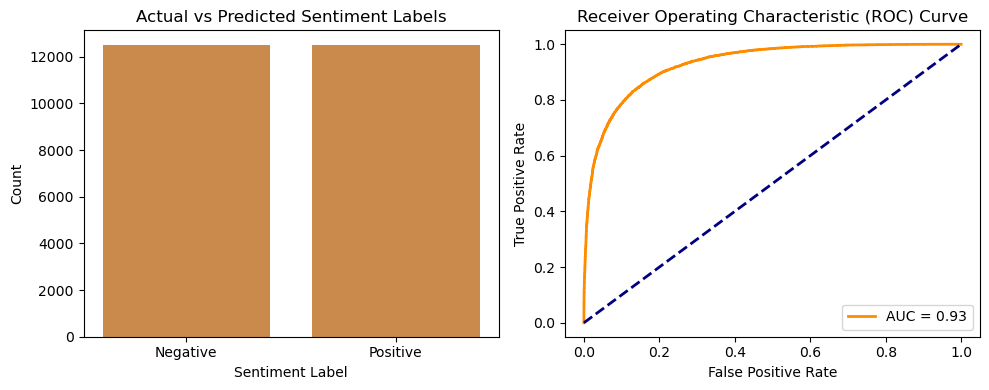

In [14]:
# Visualize model predictions
def visualize_predictions(model, x_test, y_test):
    predictions = model.predict(x_test)

    plt.figure(figsize=(10, 4))

    # Plot actual vs predicted sentiment labels
    plt.subplot(1, 2, 1)
    plt.hist(y_test, bins=[-0.5, 0.5, 1.5], alpha=0.7, rwidth=0.8, color='blue')
    plt.hist(predictions, bins=[-0.5, 0.5, 1.5], alpha=0.7, rwidth=0.8, color='orange')
    plt.title('Actual vs Predicted Sentiment Labels')
    plt.xlabel('Sentiment Label')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['Negative', 'Positive'])

    # Plot ROC curve
    plt.subplot(1, 2, 2)
    fpr, tpr, _ = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)  # Calculate AUC
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Visualize model predictions
visualize_predictions(model, x_test, y_test)